In [1]:
import os
import shutil
import random

random.seed(42)


In [9]:
import os
import numpy as np
from PIL import Image

def add_noise_and_save(source_dir, target_dir, mean=0, stddev=0.1):
    # Ensure the target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Iterate over all files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(".png") or filename.endswith(".jpg"):  # add more conditions if you have other image types
            # Load the image
            image_path = os.path.join(source_dir, filename)
            image = Image.open(image_path)
            image = np.array(image).astype(float) / 255

            # Generate Gaussian noise
            noise = np.random.normal(mean, stddev, image.shape)

            # Add the noise to the image
            noisy_image = np.clip(image + noise, 0, 1)

            # Convert the noisy image back to a PIL Image object
            noisy_image = Image.fromarray((noisy_image * 255).astype(np.uint8))

            # Save the noisy image in the target directory
            noisy_image_path = os.path.join(target_dir, filename)
            noisy_image.save(noisy_image_path)

# Add noise to all images in a directory and save the noisy images in another directory
add_noise_and_save("./Eyedata/noisytest/Images", "./Eyedata/noisytest/Images")
add_noise_and_save("./Eyedata/noisytrain/Images", "./Eyedata/noisytrain/Images")
add_noise_and_save("./Eyedata/noisyval/Images", "./Eyedata//noisyval/Images")

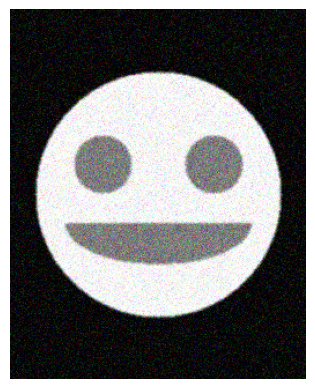

In [11]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./Eyedata/noisytest/Images/smiley_face0.png')
plt.imshow(image)
plt.axis('off')
plt.show()


In [7]:
# Define the directories
src_dir_images = './Eyedata/noisy_face'
train_dir_images = './Eyedata/noisytrain/Images/'
test_dir_images = './Eyedata/noisytest/Images/'
val_dir_images = './Eyedata/noisyval/Images/'

src_dir_landmarks = './Eyedata/landmarks'
train_dir_landmarks = './Eyedata/noisytrain/Landmarks'
test_dir_landmarks = './Eyedata/noisytest/Landmarks'
val_dir_landmarks = './Eyedata/noisyval/Landmarks'

# Create directories if they don't exist
os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(test_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)

os.makedirs(train_dir_landmarks, exist_ok=True)
os.makedirs(test_dir_landmarks, exist_ok=True)
os.makedirs(val_dir_landmarks, exist_ok=True)


# Function to delete all files in a directory
def delete_files(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Delete all files in the target directories
delete_files(train_dir_images)
delete_files(test_dir_images)
delete_files(val_dir_images)
delete_files(train_dir_landmarks)
delete_files(test_dir_landmarks)
delete_files(val_dir_landmarks)


# Get list of all files
all_files = os.listdir(src_dir_images)
random.shuffle(all_files)

# Split file names into train, test, val
train_files = all_files[:int(len(all_files)*0.7)]
test_files = all_files[int(len(all_files)*0.7):int(len(all_files)*0.85)]
val_files = all_files[int(len(all_files)*0.85):]

# Function to copy files
def copy_files(files, target_dir_images, target_dir_landmarks):
    for file in files:
        shutil.copy(os.path.join(src_dir_images, file), target_dir_images)
        landmark_file = file.replace('.png', '.npy')
        shutil.copy(os.path.join(src_dir_landmarks, landmark_file), target_dir_landmarks)
  

# Copy files into respective split folders
copy_files(train_files, train_dir_images, train_dir_landmarks)
copy_files(test_files, test_dir_images, test_dir_landmarks)
copy_files(val_files, val_dir_images, val_dir_landmarks)

In [39]:
# Define the directories
src_dir_images = './data/masksPng'
train_dir_images = './data/maskTrain/Images/'
test_dir_images = './data/maskTest/Images/'
val_dir_images = './data/maskVal/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/maskTrain/landmarks'
test_dir_landmarks = './data/maskTest/landmarks'
val_dir_landmarks = './data/maskVal/landmarks'

os.makedirs(train_dir_landmarks, exist_ok=True)
os.makedirs(test_dir_landmarks, exist_ok=True)
os.makedirs(val_dir_landmarks, exist_ok=True)

# Create directories if they don't exist
os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(test_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)

# Delete all files in the target directories
delete_files(train_dir_images)
delete_files(test_dir_images)
delete_files(val_dir_images)
delete_files(train_dir_landmarks)
delete_files(test_dir_landmarks)
delete_files(val_dir_landmarks)


# Function to delete all files in a directory
def delete_files(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Delete all files in the target directories
delete_files(train_dir_images)
delete_files(test_dir_images)
delete_files(val_dir_images)

# Get list of all files
all_files = os.listdir(src_dir_images)
random.shuffle(all_files)

# Split file names into train, test, val
train_files = all_files[:int(len(all_files)*0.7)]
test_files = all_files[int(len(all_files)*0.7):int(len(all_files)*0.85)]
val_files = all_files[int(len(all_files)*0.85):]

# Function to copy files
def copy_files(files, target_dir_images, target_dir_landmarks):
    for file in files:
        shutil.copy(os.path.join(src_dir_images, file), target_dir_images)
        landmark_file = file.replace('.png', '.npy')
        shutil.copy(os.path.join(src_dir_landmarks, landmark_file), target_dir_landmarks)

# Copy files into respective split folders
copy_files(train_files, train_dir_images, train_dir_landmarks)
copy_files(test_files, test_dir_images, test_dir_landmarks)
copy_files(val_files, val_dir_images, val_dir_landmarks)

In [2]:

# Define the directories
src_dir_images = './data/noisy_face'
train_dir_images = './data/noisytrain/Images/'
test_dir_images = './data/noisytest/Images/'
val_dir_images = './data/noisyval/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/noisytrain/Landmarks'
test_dir_landmarks = './data/noisytest/Landmarks'
val_dir_landmarks = './data/noisyval/Landmarks'

# Create directories if they don't exist
os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(test_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)

os.makedirs(train_dir_landmarks, exist_ok=True)
os.makedirs(test_dir_landmarks, exist_ok=True)
os.makedirs(val_dir_landmarks, exist_ok=True)


# Function to delete all files in a directory
def delete_files(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Delete all files in the target directories
delete_files(train_dir_images)
delete_files(test_dir_images)
delete_files(val_dir_images)
delete_files(train_dir_landmarks)
delete_files(test_dir_landmarks)
delete_files(val_dir_landmarks)

# Define the directories
src_dir_images = './data/masksPng'
train_dir_images = './data/maskTrain/Images/'
test_dir_images = './data/maskTest/Images/'
val_dir_images = './data/maskVal/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/maskTrain/landmarks'
test_dir_landmarks = './data/maskTest/landmarks'
val_dir_landmarks = './data/maskVal/landmarks'

os.makedirs(train_dir_landmarks, exist_ok=True)
os.makedirs(test_dir_landmarks, exist_ok=True)
os.makedirs(val_dir_landmarks, exist_ok=True)

# Create directories if they don't exist
os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(test_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)

# Delete all files in the target directories
delete_files(train_dir_images)
delete_files(test_dir_images)
delete_files(val_dir_images)
delete_files(train_dir_landmarks)
delete_files(test_dir_landmarks)
delete_files(val_dir_landmarks)
# Define the directories
src_dir_images = './data/masks'
train_dir_images = './data/maskTrainnpy/Images/'
test_dir_images = './data/maskTestnpy/Images/'
val_dir_images = './data/maskValnpy/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/maskTrainnpy/landmarks'
test_dir_landmarks = './data/maskTestnpy/landmarks'
val_dir_landmarks = './data/maskValnpy/landmarks'
# Create directories if they don't exist
os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(test_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)

delete_files(train_dir_images)
delete_files(test_dir_images)
delete_files(val_dir_images)
delete_files(train_dir_landmarks)
delete_files(test_dir_landmarks)
delete_files(val_dir_landmarks)
# Define the directories


In [3]:
# Directories for the images and masks
src_dir_images = './data/noisy_face'
src_dir_masks = './data/masksPng'
src_dir_landmarks = './data/landmarks'
src_dir_masksnpy = './data/masks'


# Get list of all files in the images directory
all_files = os.listdir(src_dir_images)

random.seed(42)

# Get list of all files
images_all_files = os.listdir(src_dir_images)
random.shuffle(all_files)
mask_all_files = os.listdir(src_dir_masks)
print(images_all_files)
print(mask_all_files)

# Split file names into train, test, val
train_files = all_files[:int(len(all_files)*0.7)]
test_files = all_files[int(len(all_files)*0.7):int(len(all_files)*0.85)]
val_files = all_files[int(len(all_files)*0.85):]

# Function to copy files
def copy_files(files, target_dir_images, target_dir_landmarks, bool_mask):
    if bool_mask==False:
        for file in files:
            shutil.copy(os.path.join(src_dir_images, file), target_dir_images)
            landmark_file = file.replace('.png', '.npy')
            shutil.copy(os.path.join(src_dir_landmarks, landmark_file), target_dir_landmarks)
    else:
        for file in files:
            images = file.replace('.png', '.npy')
            shutil.copy(os.path.join(src_dir_images, images), target_dir_images)
            landmark_file = file.replace('.png', '.npy')
            shutil.copy(os.path.join(src_dir_landmarks, landmark_file), target_dir_landmarks)


# Define the directories
src_dir_images = './data/noisy_face'
train_dir_images = './data/noisytrain/Images/'
test_dir_images = './data/noisytest/Images/'
val_dir_images = './data/noisyval/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/noisytrain/Landmarks'
test_dir_landmarks = './data/noisytest/Landmarks'
val_dir_landmarks = './data/noisyval/Landmarks'

# Copy files into respective split folders
copy_files(train_files, train_dir_images, train_dir_landmarks, False)
copy_files(test_files, test_dir_images, test_dir_landmarks, False)
copy_files(val_files, val_dir_images, val_dir_landmarks, False)

# Define the directories
src_dir_images = './data/masksPng'
train_dir_images = './data/maskTrain/Images/'
test_dir_images = './data/maskTest/Images/'
val_dir_images = './data/maskVal/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/maskTrain/landmarks'
test_dir_landmarks = './data/maskTest/landmarks'
val_dir_landmarks = './data/maskVal/landmarks'

# Define the directories
copy_files(train_files, train_dir_images, train_dir_landmarks, False)
copy_files(test_files, test_dir_images, test_dir_landmarks, False)
copy_files(val_files, val_dir_images, val_dir_landmarks, False)


# Define the directories
src_dir_images = './data/masks'
train_dir_images = './data/maskTrainnpy/Images/'
test_dir_images = './data/maskTestnpy/Images/'
val_dir_images = './data/maskValnpy/Images/'

src_dir_landmarks = './data/landmarks'
train_dir_landmarks = './data/maskTrainnpy/landmarks'
test_dir_landmarks = './data/maskTestnpy/landmarks'
val_dir_landmarks = './data/maskValnpy/landmarks'

# Define the directories
copy_files(train_files, train_dir_images, train_dir_landmarks, True)
copy_files(test_files, test_dir_images, test_dir_landmarks, True)
copy_files(val_files, val_dir_images, val_dir_landmarks, True)

['smiley_face0.png', 'smiley_face1.png', 'smiley_face10.png', 'smiley_face11.png', 'smiley_face12.png', 'smiley_face13.png', 'smiley_face14.png', 'smiley_face15.png', 'smiley_face16.png', 'smiley_face17.png', 'smiley_face18.png', 'smiley_face19.png', 'smiley_face2.png', 'smiley_face20.png', 'smiley_face21.png', 'smiley_face22.png', 'smiley_face23.png', 'smiley_face24.png', 'smiley_face25.png', 'smiley_face26.png', 'smiley_face27.png', 'smiley_face28.png', 'smiley_face29.png', 'smiley_face3.png', 'smiley_face30.png', 'smiley_face31.png', 'smiley_face32.png', 'smiley_face33.png', 'smiley_face34.png', 'smiley_face35.png', 'smiley_face36.png', 'smiley_face37.png', 'smiley_face38.png', 'smiley_face39.png', 'smiley_face4.png', 'smiley_face40.png', 'smiley_face41.png', 'smiley_face42.png', 'smiley_face43.png', 'smiley_face44.png', 'smiley_face45.png', 'smiley_face46.png', 'smiley_face47.png', 'smiley_face48.png', 'smiley_face49.png', 'smiley_face5.png', 'smiley_face50.png', 'smiley_face51.png

In [3]:
import numpy as np, cv2
import matplotlib.pyplot as plt

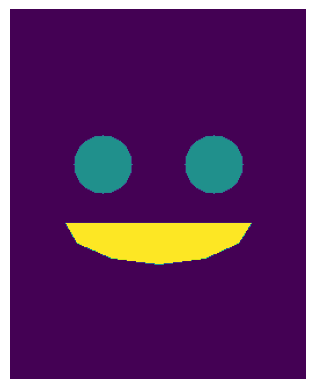

In [49]:
mask = np.load(f"./data/maskTestnpy/Images/smiley_face9.npy").astype(np.uint8)


plt.imshow(mask)
plt.axis('off')
plt.show()


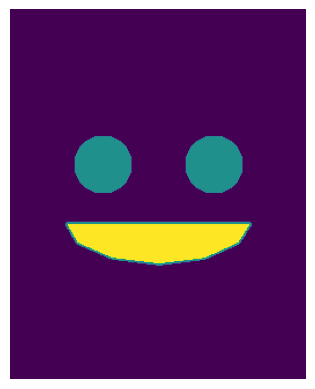

In [61]:
from skimage import io, transform
import numpy as np

import matplotlib.pyplot as plt 

image1 = io.imread(f"./data/maskTrain/Images/smiley_face1.png")#.astype('float') /255
image4 = cv2.GaussianBlur(image1, (5, 5), 0).astype('float') / 255

image4 = np.expand_dims(image4, axis=2)


plt.imshow(image4)
plt.axis('off')
plt.show()


In [53]:
import numpy as np

# Get unique values and their counts
unique, counts = np.unique(image1, return_counts=True)

# Print occurrences
for u, c in zip(unique, counts):
    print(f"Value: {u}, Count: {c}")

Value: 0.0, Count: 73666
Value: 0.00392156862745098, Count: 3922
Value: 0.00784313725490196, Count: 4332


float64


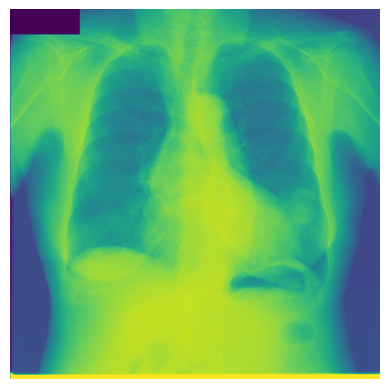

In [15]:
import numpy as np
image2 = io.imread(f"../HybridGNet-main/HybridGNet-main/Datasets/JSRT/Train/Images/JPCLN002.png").astype('float') / 255.0
# image2 = np.expand_dims(image2, axis=2)
print(image2.dtype)
# Get unique values and their counts
unique, counts = np.unique(image2, return_counts=True)

# Print occurrences
# for u, c in zip(unique, counts):
#     print(f"Value: {u}, Count: {c}")
plt.imshow(image2)
plt.axis('off')
plt.show()

In [35]:
# Check if the two images have the same data type
print(f"Data types are the same: {image1.dtype == image2.dtype}")

print(image1.dtype)
print(image2.dtype)

Data types are the same: True
float64
float64


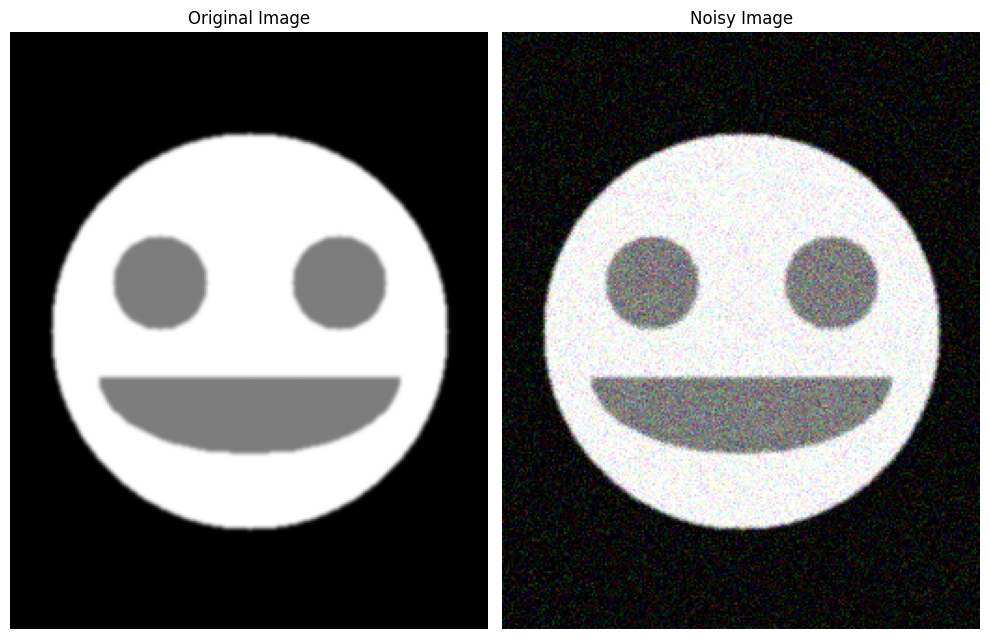

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def add_noise(image_path, mean=0, stddev=0.1):
    # Load the image
    image = Image.open(image_path)
    image = np.array(image).astype(float) / 255

    # Generate Gaussian noise
    noise = np.random.normal(mean, stddev, image.shape)

    # Add the noise to the image
    noisy_image = np.clip(image + noise, 0, 1)

    # Display the original and noisy images
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Add noise to an image
add_noise("./data/noisy_face/smiley_face0.png")

In [2]:
import os
import numpy as np
from PIL import Image

def add_noise_and_save(source_dir, target_dir, mean=0, stddev=0.1):
    # Ensure the target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Iterate over all files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(".png") or filename.endswith(".jpg"):  # add more conditions if you have other image types
            # Load the image
            image_path = os.path.join(source_dir, filename)
            image = Image.open(image_path)
            image = np.array(image).astype(float) / 255

            # Generate Gaussian noise
            noise = np.random.normal(mean, stddev, image.shape)

            # Add the noise to the image
            noisy_image = np.clip(image + noise, 0, 1)

            # Convert the noisy image back to a PIL Image object
            noisy_image = Image.fromarray((noisy_image * 255).astype(np.uint8))

            # Save the noisy image in the target directory
            noisy_image_path = os.path.join(target_dir, filename)
            noisy_image.save(noisy_image_path)

# Add noise to all images in a directory and save the noisy images in another directory
add_noise_and_save("./data/noisytest/Images", "./unetdata/noisytest/Images")
add_noise_and_save("./data/noisytrain/Images", "./unetdata/noisytrain/Images")
add_noise_and_save("./data/noisyval/Images", "./unetdata//noisyval/Images")

(320, 256)
(320, 256, 1)
float64


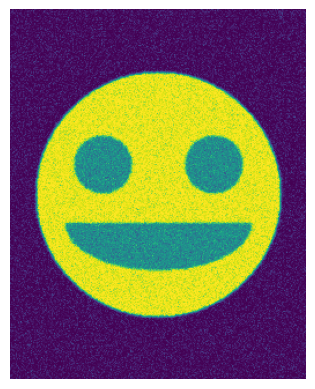

In [20]:
from skimage import io, transform
import numpy as np

import matplotlib.pyplot as plt 

image1 = io.imread(f"./unetdata/noisytest/Images/smiley_face0.png", as_gray=True).astype('float')/255
print(image1.shape)
image = np.expand_dims(image1, axis=2)
print(image.shape)
print(image1.dtype)
plt.imshow(image1)
plt.axis('off')
plt.show()